# Использование `K-means` для сжатия


Еще одно полезное применение кластеризации — сжатие изображений. Схема до удивления проста: похожие, рядом расположенные цвета, стоит объединить в один цвет. Давайте провернем это самостоятельно.

Считайте изображение из вашего индивидуального задания.

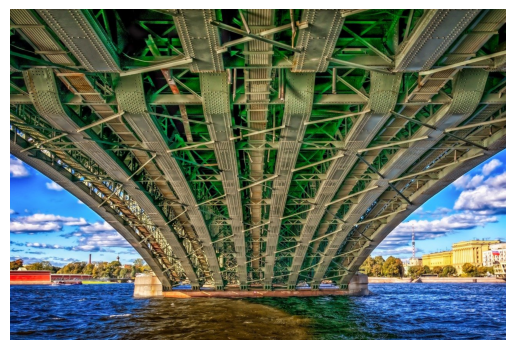

In [35]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2
import numpy as np


# Путь к изображению
img_path = 'spb_bridge.jpg'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

Перед нами трехканальное (RGB) изображение. Вычислите среднее значение интенсивности пикселей по всем каналам.

In [36]:
# < ENTER YOUR CODE HE# Вычисляем среднее значение интенсивности пикселей по всем каналам
mean_intensity = np.mean(img, axis=(0, 1))

# Выводим средние значения интенсивности для каждого канала
print("Среднее значение интенсивности красного канала (R):", mean_intensity[0])
print("Среднее значение интенсивности зеленого канала (G):", mean_intensity[1])
print("Среднее значение интенсивности синего канала (B):", mean_intensity[2])
print("Среднее значение интенсивности канала:", (mean_intensity[0]+mean_intensity[1]+mean_intensity[2])/3)

Среднее значение интенсивности красного канала (R): 87.89052425263775
Среднее значение интенсивности зеленого канала (G): 99.75712283851114
Среднее значение интенсивности синего канала (B): 84.4493158338218
Среднее значение интенсивности канала: 90.6989876416569


Нормируйте значения интенсивностей пикселей, разделив все значения на $255$. Вычислите среднее значение интенсивности пикселей по всем каналам после проделанного преобразования.

In [37]:
# Нормируем значения интенсивности пикселей, разделив на 255
normalized_img = img / 255.0

# Вычисляем среднее значение интенсивности пикселей по всем каналам
mean_intensity_normalized = np.mean(normalized_img, axis=(0, 1))

# Выводим средние значения интенсивности для каждого канала после нормирования
print("Среднее значение интенсивности красного канала (R) после нормирования:", mean_intensity_normalized[0])
print("Среднее значение интенсивности зеленого канала (G) после нормирования:", mean_intensity_normalized[1])
print("Среднее значение интенсивности синего канала (B) после нормирования:", mean_intensity_normalized[2])
print("Среднее значение интенсивности после нормирования:", (mean_intensity_normalized[0]+mean_intensity_normalized[1]+mean_intensity_normalized[2])/3)


Среднее значение интенсивности красного канала (R) после нормирования: 0.3446687225593351
Среднее значение интенсивности зеленого канала (G) после нормирования: 0.3912044032885399
Среднее значение интенсивности синего канала (B) после нормирования: 0.33117378758357435
Среднее значение интенсивности после нормирования: 0.35568230447714977


Давайте убедимся в том, что исходное пространство цветов, насчитывающее около $16$ миллионов возможных состояний ($256^3$), слишком велико, и его размерность можно понижать. Для наглядности построим лишь некоторые подвыборки зависимостей значений интенсивностей и лишь на случайном поднаборе пикселей.

«Распрямите» изображение так, чтобы <code>.shape</code> соответствущего массива имел вид <code>(высота * ширина, 3)</code>

In [38]:
# Функция принимает на вход "распрямленный" массив, соответствующий изображению

def plot_pixels(data, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

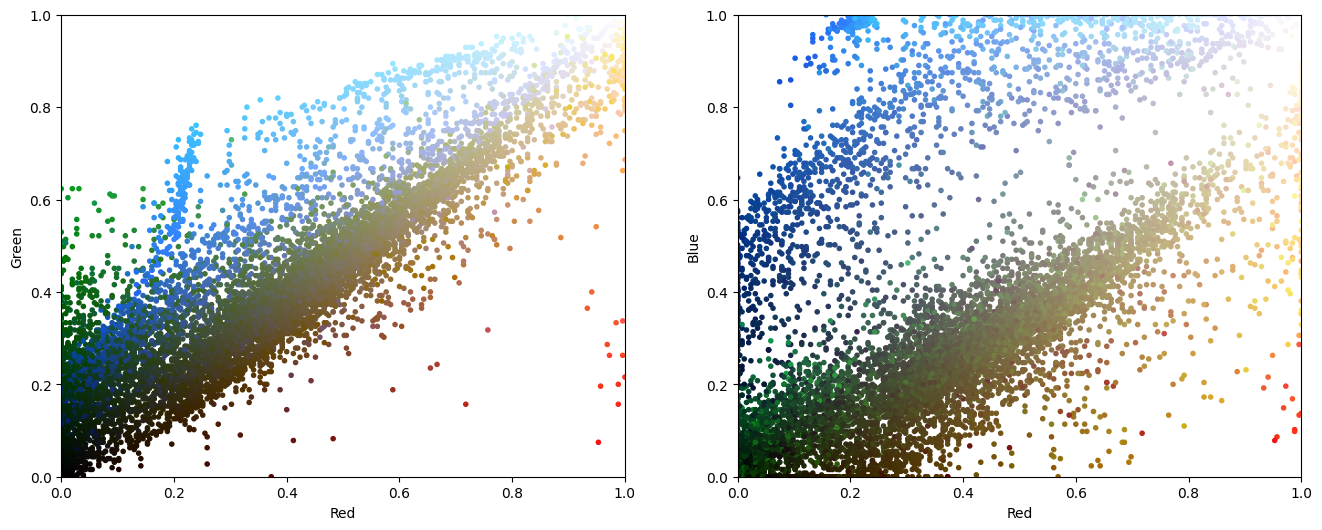

In [39]:
# Распрямляем изображение
flattened_img = normalized_img.reshape(-1, 3)

# Вызываем функцию plot_pixels для визуализации
plot_pixels(flattened_img)
plt.show()


Переведем 16 миллионов возможностей во всего-навсего 16 возможностей, используя <code>K-means</code>. Правда, чтобы ускорить работу алгоритма, мы будем использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html"><code>K-means</code> на батчах</a> — поднаборах данных. Заодно увидим, портит ли это результат.

Обучите модель <code>MiniBatchKMeans</code> на нормированном и «распрямленном» изображении с параметрами, указанными в вашем задании.

В изображении замените значения цветов каждого пикселя на значения координат центроида кластера к которому был отнесен этот пиксель. Постройте графики зависимостей цветов при помощи <code>plot_pixels()</code> с новой палитрой (параметр <code>colors</code>)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


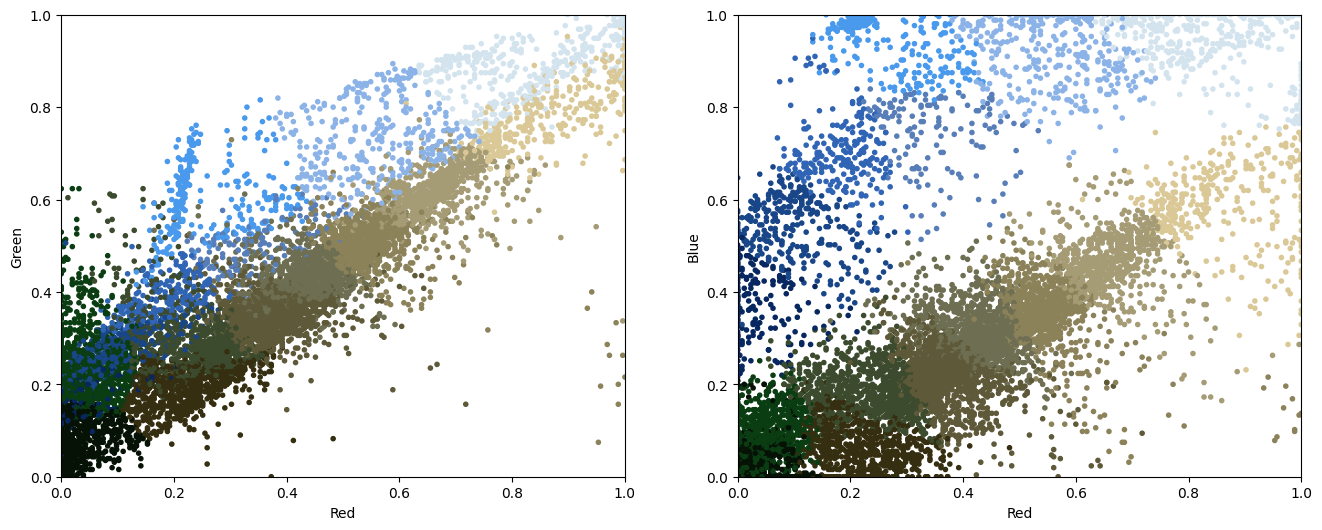

In [40]:
from sklearn.cluster import MiniBatchKMeans

# Создаем и обучаем модель MiniBatchKMeans
n_colors = 16  # Количество цветов, на которое мы хотим уменьшить
kmeans = MiniBatchKMeans(n_clusters=n_colors, random_state=16, batch_size=100)
kmeans.fit(flattened_img)

# Заменяем значения цветов каждого пикселя на значения центроида кластера
new_colors = kmeans.cluster_centers_[kmeans.predict(flattened_img)]

# Построим графики зависимостей цветов с новой палитрой
plot_pixels(flattened_img, colors=new_colors)
plt.show()


Вычислите среднее значение интенсивности пикселей полученного изображения.

In [41]:
# Вычисляем среднее значение интенсивности пикселей на изображении после замены цветов
mean_intensity_clustered = np.mean(new_colors, axis=0)

# Выводим средние значения интенсивности для каждого канала (R, G, B)
print("Среднее значение интенсивности красного канала (R) на обработанном изображении:", mean_intensity_clustered[0])
print("Среднее значение интенсивности зеленого канала (G) на обработанном изображении:", mean_intensity_clustered[1])
print("Среднее значение интенсивности синего канала (B) на обработанном изображении:", mean_intensity_clustered[2])
print("Среднее значение интенсивности на обработанном изображении:", (mean_intensity_clustered[0]+mean_intensity_clustered[1]+mean_intensity_clustered[2])/3)



Среднее значение интенсивности красного канала (R) на обработанном изображении: 0.34166354411302824
Среднее значение интенсивности зеленого канала (G) на обработанном изображении: 0.3891332943681234
Среднее значение интенсивности синего канала (B) на обработанном изображении: 0.33005632797861395
Среднее значение интенсивности на обработанном изображении: 0.3536177221532552


Выберите номер изображения, соответствующего палитре из $16$ цветов.

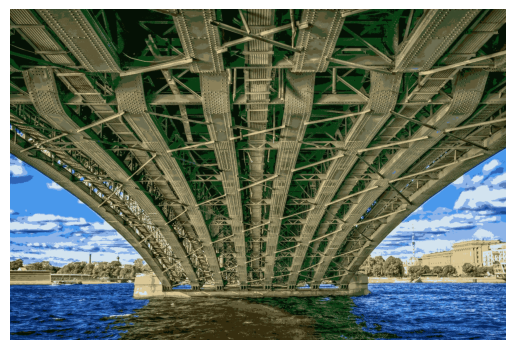

In [42]:
# Находим индексы ближайших кластеров для каждого пикселя
cluster_indices = kmeans.predict(flattened_img)

# Выбираем изображение из палитры на основе индексов кластеров
image_from_palette = kmeans.cluster_centers_[cluster_indices]

# Визуализируем изображение из палитры
plt.axis('off')
plt.imshow(image_from_palette.reshape(img.shape))
plt.show()


Пора смотреть на результат! Постройте рядом оригинальное изображение и изображение, в котором используется лишь $16$ цветов.

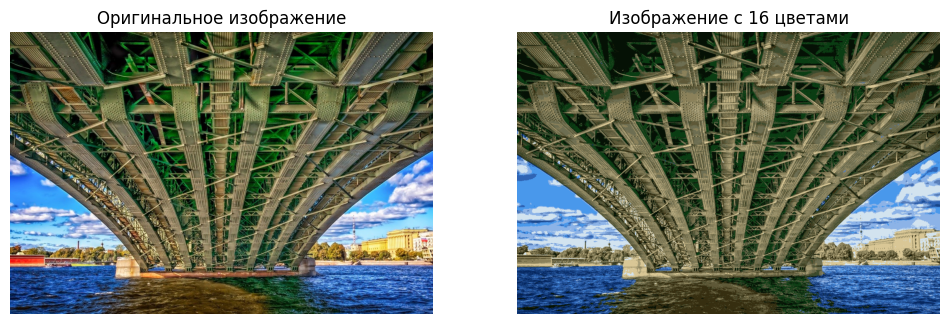

In [43]:
# Визуализация оригинального изображения
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Оригинальное изображение')
plt.imshow(img)

# Визуализация изображения с палитрой из 16 цветов
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('Изображение с 16 цветами')
plt.imshow(image_from_palette.reshape(img.shape))

plt.show()


Постройте изображение размера $4 \times 4$ на основе полученных $16$ цветов. Выберите верное изображение.

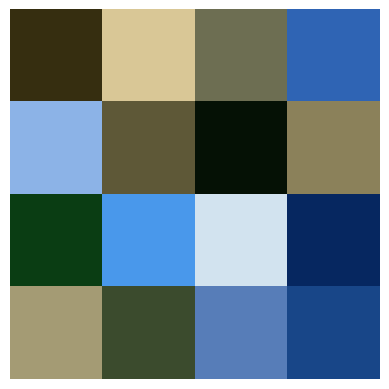

In [44]:
# Выбираем 16 цветов из палитры
chosen_colors = kmeans.cluster_centers_

# Создаем матрицу пикселей размером 4x4
small_image = chosen_colors.reshape((4, 4, 3))

# Визуализируем полученное изображение
plt.axis('off')
plt.imshow(small_image)
plt.show()
